In [70]:
!pip install -U -q google-generativeai # Install python SDK

In [71]:
# Configuring SDK With API Key
import google.generativeai as GenAi
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
GenAi.configure(api_key=GOOGLE_API_KEY)

In [72]:
model = GenAi.GenerativeModel('gemini-1.0-pro')
response = model.generate_content("Please give me a sample code to build a Gen AI image generation Application.")
print(response.text)

```python
import os
from PIL import Image
from io import BytesIO

from flask import Flask, request, jsonify
from transformers import AutoTokenizer, AutoModelForImageGeneration


# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("google/vit-base-patch16-224-in21k")
model = AutoModelForImageGeneration.from_pretrained("google/vit-base-patch16-224-in21k")

# Create the Flask app
app = Flask(__name__)

@app.route("/generate", methods=["POST"])
def generate():
    # Get the image from the request
    image = Image.open(request.files["image"])

    # Preprocess the image
    image = image.resize((224, 224))
    image = image.convert("RGB")
    image = Image.fromarray(np.array(image))

    # Encode the image
    inputs = tokenizer(image, return_tensors="pt")

    # Generate the image
    outputs = model.generate(**inputs)

    # Decode the image
    image = Image.fromarray(outputs[0].numpy())

    # Return the image
    return jsonify({"image": image.tobytes()})

if __na

In [73]:
response1 = model.generate_content("Please give me image of dog which is playing at the beach.")
print(response1.text) # generate_content method is designed for text based content, so it wont generate images

<start_of_image>上品な女性にぴったりな、ゴージャスなダイヤモンドリング画像はありますか？


In [74]:
response2 = model.generate_content("Please give me roles and responsibilities of Generative AI Engineer.")
print(response2.text)

**Roles and Responsibilities of a Generative AI Engineer**

**1. Research and Development**

* Conduct research on generative AI algorithms, models, and techniques
* Develop and implement new generative AI models and pipelines
* Optimize and improve existing generative AI systems to enhance performance

**2. Model Design and Development**

* Design and build generative AI models based on project requirements
* Train and fine-tune generative AI models using appropriate datasets
* Evaluate and validate model performance against established metrics

**3. Integration and Deployment**

* Integrate generative AI models into existing pipelines or applications
* Deploy and monitor generative AI systems in various environments
* Optimize model deployment for performance, scalability, and cost-effectiveness

**4. Data Management and Preprocessing**

* Gather, preprocess, and clean datasets for model training
* Prepare and format datasets in a suitable format for generative AI models
* Identify a

In [75]:
# Comaring the output by giving clear prompt
response3 = model.generate_content("Please give me roles and responsibilities of Generative AI Enfineer in 5 bullet points.")
print(response3.text)

- **Develop and implement generative AI systems:** Design, build, and deploy machine learning models that generate new data, such as text, images, or music.
- **Collaborate with domain experts:** Work closely with subject matter experts to understand the specific needs and requirements of generative AI applications.
- **Monitor and evaluate system performance:** Regularly assess the accuracy, efficiency, and fairness of generative AI systems to ensure they meet desired outcomes.
- **Explore and integrate new technologies:** Stay abreast of emerging generative AI techniques and technologies to continuously improve system capabilities.
- **Ensure ethical and responsible AI development:** Adhere to ethical guidelines and best practices to ensure generative AI systems are used in a responsible and transparent manner.


In [76]:
# Testing the outout with different vesrion of gemini AI model
model = GenAi.GenerativeModel('gemini-pro')
response4 = model.generate_content("Please give me a sample code to build a Gen AI image generation Application.")
print(response4.text)

```python
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForImageGeneration

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/image-gpt")
model = AutoModelForImageGeneration.from_pretrained("google/image-gpt")

# Define the prompt
prompt = "A photo of a cat"

# Tokenize the prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# Generate an image
with torch.no_grad():
    output = model.generate(input_ids, max_length=128)

# Decode the output
image = tokenizer.batch_decode(output, skip_special_tokens=True)

# Display the image
plt.imshow(image)
plt.show()
```


In [77]:
# Testing the outout with different vesrion of gemini AI model
model = GenAi.GenerativeModel('gemini-1.5-pro')
response5 = model.generate_content("Please give me a sample code to build a Gen AI image generation Application.")
print(response5.text)

```python
import streamlit as st
from PIL import Image
from io import BytesIO
import requests

# Replace with your actual API key and endpoint
API_KEY = "YOUR_API_KEY"  # Replace with your API key
API_URL = "https://api.stability.ai/v1/generation/{engine_id}/text-to-image" # Replace with your API URL and engine ID

def generate_image(prompt, engine_id="stable-diffusion-xl-beta-v2-2-2"):
    """Generates an image from a given prompt using the Stability AI API."""

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {API_KEY}",
    }

    payload = {
        "text_prompts": [{"text": prompt}],
        "cfg_scale": 7,
        "clip_guidance_preset": "FAST_BLUE",
        "height": 512,
        "width": 512,
        "samples": 1,
        "steps": 30,  # Adjust for quality/speed tradeoff
    }


    try:
        response = requests.post(API_URL.format(engine_id=engine_id), headers=headers, json=payload)
        response.raise_for_status() # Raise an 

In [78]:
model = GenAi.GenerativeModel(
    'gemini-pro',
    generation_config=GenAi.GenerationConfig(
        max_output_tokens=2000,
        temperature=0.9, #Change this to check the creativity of the model
    ))

In [79]:
response6 = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = GenAi.GenerationConfig(stop_sequences=['\n6'])
)
print(response6.text)

1. Cats have an average of 32 teeth.
2. A cat's hearing is three times sharper than a human's.
3. A group of cats is called a clowder.
4. Cats can jump up to six times their height.
5. A cat's whiskers are used to measure spaces and gauge distances.


In [80]:
model = GenAi.GenerativeModel(
    'gemini-pro',
    generation_config=GenAi.GenerationConfig(
        max_output_tokens=1000,
        temperature=0.9, #Change this to check the creativity of the model
    ))

In [81]:
response7 = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = GenAi.GenerationConfig(stop_sequences=['\n6'])
)
print(response7.text)

1. The average lifespan of a domestic cat is 12-15 years.
2. Cats have 32 muscles in each of their ears.
3. The world's smallest cat breed is the Singapura, which stands just 4-6 inches tall.
4. Cats have a third eyelid, called the nictitating membrane, which helps protect their eyes.
5. Cats' whiskers are highly sensitive and help them navigate in the dark.


In [82]:
model = GenAi.GenerativeModel(
    'gemini-pro',
    generation_config=GenAi.GenerationConfig(
        max_output_tokens=1000,
        temperature=0.4, #Change this to check the creativity of the model
    ))

In [83]:
response8 = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = GenAi.GenerationConfig(stop_sequences=['\n6'])
)
print(response8.text)

1. Cats have 32 muscles in each of their ears, allowing them to rotate them 180 degrees.
2. The average lifespan of an indoor cat is 12-15 years, while outdoor cats typically live for 2-5 years.
3. Cats have a highly developed sense of smell, with approximately 200 million scent receptors in their noses.
4. Cats are obligate carnivores, meaning they must eat meat to survive.
5. Cats have a unique organ called the Jacobson's organ, which allows them to detect pheromones and other scents.


In [84]:
model = GenAi.GenerativeModel(
    'gemini-pro',
    generation_config=GenAi.GenerationConfig(
        max_output_tokens=50,
        temperature=0.9, #Change this to check the creativity of the model
    ))

response9 = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = GenAi.GenerationConfig(stop_sequences=['\n6'])
)
print(response9.text)

1. Cats have a field of vision of about 200 degrees, compared to humans with about 180 degrees.
2. Cats are obligate carnivores, meaning they must eat meat to survive.
3. Cats have


In [85]:
model = GenAi.GenerativeModel(
    'gemini-pro',
    generation_config=GenAi.GenerationConfig(
        max_output_tokens=50,
        temperature=0.4, #Change this to check the creativity of the model
    ))

response10 = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = GenAi.GenerationConfig(stop_sequences=['\n6'])
)
print(response10.text)

1. Cats have 32 muscles in each of their ears.
2. The average lifespan of an indoor cat is 12-15 years, while the average lifespan of an outdoor cat is 2-5 years.
3


In [86]:
model = GenAi.GenerativeModel(
    'gemini-pro',
    generation_config=GenAi.GenerationConfig(
        max_output_tokens=50,
        temperature=0.1, #Change this to check the creativity of the model
    ))

response11 = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = GenAi.GenerationConfig(stop_sequences=['\n6'])
)
print(response11.text)

1. Cats have 32 muscles in each of their ears, allowing them to rotate them 180 degrees.
2. The average lifespan of an indoor cat is 12-15 years, while outdoor cats typically live for


In [87]:
!curl -o ai.jpg "https://t3.ftcdn.net/jpg/09/19/99/82/240_F_919998242_GDmtbbzkdcAy7x1kIJqRsx0JnoRRh74D.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34707  100 34707    0     0   186k      0 --:--:-- --:--:-- --:--:--  187k


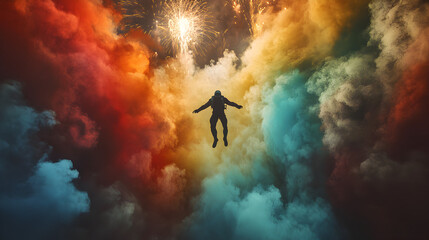

In [88]:
import PIL.Image
img = PIL.Image.open('ai.jpg')
img

In [89]:
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""


model = GenAi.GenerativeModel('gemini-1.5-pro')
response12 = model.generate_content([prompt, img])
print(response12.text)

```json
{
  "description": "A person is shown suspended in mid-air amidst a vibrant display of colored smoke and fireworks. The individual appears to be wearing a full-body suit or outfit, likely a wingsuit or specialized skydiving gear. The smoke creates a dramatic backdrop with distinct plumes of red, orange, yellow, and teal.  Fireworks are exploding above, adding to the spectacle and suggesting a celebratory or festive atmosphere. The overall impression is one of freedom, excitement, and perhaps even a performance or artistic expression.",
  "features": [
    "Person in mid-air",
    "Full-body suit/outfit (possibly wingsuit)",
    "Multicolored smoke plumes (red, orange, yellow, teal)",
    "Fireworks display"
  ]
}
```
